# Práctica 1 - Predicción de Subscripción a un Producto Bancario
**Miembros del grupo:** Christian Cano, Adrián Curell


## 1.EDA simplificado:
Lo primero que haremos será hacer el EDA del proyecto que nos permitirá entender, limpiar y visualizar la estructura de los datos antes de entrenar el modelo. Esto es fundamental para detectar errores, manejar valores nulos, identificar valores atípicos (outliers) y descubrir patrones o correlaciones ocultas que mejoran la precisión del modelo

### 1.1.Librerias:
Aquí importaremos todas las librerias que necesitaremos para hacer las comprobaciones del EDA, las cuales iremos nombrando segun se vayan necesitando. También creamos la semilla de reproducibilidad con uno de nuestros NIAs.

In [84]:
from google.colab import files
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Semilla de reproducibilidad
semilla = 100522320
np.random.seed(semilla)

### 1.2.Carga de datos:
Para acceder a bank_02.pkl primero tenemos que insertarlo al notebook. Esto la haremos con el uso de la biblioteca:

"from google.colab import files"

También usaremos pandas para tomarlo como dataframe.

In [85]:
# Subimos y leemos el pickle.
archivo = files.upload()
nombre_archivo=list(archivo.keys())[0]
with open(nombre_archivo,'rb') as f:
  datos=pickle.load(f)

df_datos = pd.DataFrame(datos)

Saving bank_02.pkl to bank_02 (2).pkl


/tmp/ipython-input-332/2133411788.py:5: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  datos=pickle.load(f)


### 1.3.Numero de instancias y variables:
Con el uso de pandas podemos ver cuantas instancias y variables hay gracias al atributo shape.

En este caso hay 11000 instancias y 17 variables.

In [86]:
# Determinar cuántas variables e instancias hay.
print(f'Dimensiones del dataset: {df_datos.shape}')
print(f'Número de instancias: {df_datos.shape[0]}')
print(f'Número de variables: {df_datos.shape[1]}')
df_datos.head()

Dimensiones del dataset: (11000, 17)
Número de instancias: 11000
Número de variables: 17


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,None,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


### 1.4.Tipo de las variables:
Lo primero que haremos será ver con pandas y su función dtypes el tipo de cada variable. Asi podremos separarlas en numéricas o no numericas y este último grupo se separará posteriormente en categóricas y ordinales.

In [87]:
print(df_datos.dtypes.values)

[dtype('int64') dtype('O') dtype('O') dtype('O') dtype('O') dtype('int64')
 dtype('O') dtype('O') dtype('O') dtype('int64') dtype('O') dtype('int64')
 dtype('int64') dtype('int64') dtype('int64') dtype('O') dtype('O')]


Como podemos ver todas son o int64 o Object por lo que podemos hacer un clasificador automático que las separe en numéricas (int64) o no numéricas (Object) que se dividirá en categóricas o ordinales. Para realizarlo haremos:

1. Dividir las variables en numéricas o no numéricas según su dtype utilizando la función select_dtypes.

2. De las no numéricas sacamos con unique los distintos valores que tienen y con nunique el numero total.

    *Esto nos servirá para ver que tanto education como month son variables ordinales y más tarde para sacar las categoricas con alta cardinalidad.

3. Creamos 2 listas más, una para el tipo (numéricas, categórica o ordinal) y otra para el rol (Target o Feature).

4. Recorrer el dataframe con un bucle y rellenando estas listas con los datos de las variables.

5. Crear un dataframe donde introduzcamos los datos de estas listas juntos al nombre y dtype de cada variable.

In [88]:
# Clasificación automática de variables
variables_numericas = df_datos.select_dtypes(include=[np.number]).columns.tolist()
variables_no_numericas = df_datos.select_dtypes(include=['object']).columns.tolist()
target = 'deposit'

N_unique = []
Valores = []

for i in variables_no_numericas:
  N_unique.append(df_datos[i].nunique())
  Valores.append(df_datos[i].unique())

cardinalidad = pd.DataFrame({
    'Variable': variables_no_numericas,
    'N_unique': N_unique,
    'Valores': Valores
})
print(cardinalidad[['Variable', 'N_unique', 'Valores']].to_string(index=False))

variables_categoricas = []
variables_ordinales = []

for x in variables_no_numericas:
  if x in ('month','education'):
    variables_ordinales.append(x)
  else:
    variables_categoricas.append(x)


# Imprimimos la clasificación
print('\n=== Variables NUMÉRICAS ===')
print(variables_numericas)
print('\n=== Variables CATEGÓRICAS ===')
print(variables_categoricas)
print('\n=== Variables ORDINALES ===')
print(variables_ordinales)
print(f'\nTarget: {target}')

# Creamos listas vacías donde almacenar los tipos y roles de cada variable
lista_tipo = []
lista_rol = []

# Recorrer columnas
for c in df_datos.columns:
  # Tipo (Numérica, Categórica o Ordinal)
  if c in variables_numericas:
    lista_tipo.append('Numérica')
  elif c in variables_categoricas:
      lista_tipo.append('Categórica')
  else:
    lista_tipo.append('Ordinal')

  # Rol (Target o Feature)
  if c == target:
      lista_rol.append('Target')
  else:
      lista_rol.append('Feature')

# Crear DataFrame final
resumen_tipos = pd.DataFrame({
    'Variable': df_datos.columns,
    'Dtype': df_datos.dtypes.values,
    'Tipo': lista_tipo,
    'Rol': lista_rol
})

print('\n', resumen_tipos.to_string(index=True))

 Variable  N_unique                                                                                                                                      Valores
      job        12 [admin., technician, services, management, retired, blue-collar, None, unemployed, entrepreneur, housemaid, self-employed, student, unknown]
  marital         3                                                                                                            [married, None, single, divorced]
education         4                                                                                                      [secondary, tertiary, primary, unknown]
  default         2                                                                                                                                    [no, yes]
  housing         2                                                                                                                                    [yes, no]
     loan         2               

### 1.5.Cardinalidad de variables categóricas y ordinales
Utilizando el dataframe cardinalidad, creado anteriormente, vamos a añadir una nueva columna que será True o False dependiendo de si cumple la condición de que N_unique > 10.

Podemos ver que las variables que lo cumplen son job y month.

In [89]:
cardinalidad['Alta_cardinalidad (>10)'] = cardinalidad['N_unique'] > 10

print(cardinalidad[['Variable', 'N_unique', 'Alta_cardinalidad (>10)']].to_string(index=False))

#Nos quedamos solo con las variables que cumplan la alta cardinalidad
card_alta = cardinalidad[cardinalidad['Alta_cardinalidad (>10)']]['Variable'].tolist()

if card_alta:
  print(f'\nVariables con alta cardinalidad: {card_alta}')
else:
  print("Ninguna")


 Variable  N_unique  Alta_cardinalidad (>10)
      job        12                     True
  marital         3                    False
education         4                    False
  default         2                    False
  housing         2                    False
     loan         2                    False
  contact         3                    False
    month        12                     True
 poutcome         4                    False
  deposit         2                    False

Variables con alta cardinalidad: ['job', 'month']


### 1.6.Valores faltantes:
Vamos a crear un dataframe donde tendremos 3 columnas:

* Variable: El nombre de las variables con valores faltantes.
* Valores faltantes: El numero total de valores que le faltan a esa variable
* % faltantes: El porcentaje de valores faltantes sobre el total de esa variable.

Esto nos mostrará que las variables job y marital tienen datos que faltan.



In [90]:
faltan = pd.DataFrame({
    'Variable': df_datos.columns,
    'Valores faltantes': df_datos.isnull().sum().values,
    '% faltantes': (df_datos.isnull().mean() * 100).round(2).values
})
faltan = faltan[faltan['Valores faltantes'] > 0]

if faltan.empty:
    print('No hay valores faltantes (NaN) en el dataset.')
else:
    print('Variables con valores faltantes:')
    print(faltan.to_string(index=False))

Variables con valores faltantes:
Variable  Valores faltantes  % faltantes
     job                264         2.40
 marital                169         1.54


### 1.7.Columnas constantes o de ID:
Las columnas constantes son aquellas en las cuales todas las filas tienen el mismo número mientras que las de id son las que tienen un valor distinto en cada fila.

Para encontrar variables que cumplan alguna de estas reglas podemos usar un bucle que compruebe si alguna columna tiene el mismo número de datos únicos que filas usando df_datos[a].nunique() == len(df_datos) o si por el contrario todas son iguales , que se comprueba con df_datos[a].nunique() == 1.

En este caso veremos que no existe ninguna columna que cumpla alguna de las 2 condiciones.

In [91]:
columnas_constantes = []
columnas_id = []
for a in df_datos.columns:
  if df_datos[a].nunique() == 1:
    columnas_constantes.append(a)
  if df_datos[a].nunique() == len(df_datos):
    columnas_id.append(a)

if not columnas_constantes:
  print("No hay columnas constantes.\n")
else:
  print(f'Las columnas constantes son: {columnas_constantes}\n')

if not columnas_id:
  print("No hay columnas de id.")
else:
  print(f'Las columnas de id son: {columnas_id}')



No hay columnas constantes.

No hay columnas de id.


### 1.8.¿Regresión o clasificación?

Para saber si es un problema de regresión o clasificación tenemos que fijarnos en los valores únicos de la variables target. Teniendo en cuenta que estos son yes y no y que antes la hemos colocado como variable categórica podemos afirmar que este será un problema de clasificación.

Encuanto a los datos podemos decir si están balanceados o no fijandonos en la relación entre la frecuencia de uno y otro lo que nos da en este caso un coeficiente de 1.11 por lo que estan balanceados.

**USO DE IA:** Nos hemos ayudado un poco de claude para la sintaxis y creación del gráfico pidiendole que nos diga que funciones y librerias teniamos que usar.

Target: "deposit" — Valores únicos: ['yes' 'no']
Se trata de un problema de CLASIFICACIÓN BINARIA

Clase  Frecuencia  Porcentaje (%)
   no        5780           52.55
  yes        5220           47.45

Ratio mayoría/minoría: 1.11
El dataset está BALANCEADO.


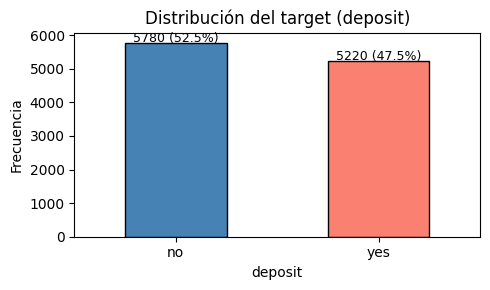

In [92]:
print(f'Target: "{target}" — Valores únicos: {df_datos[target].unique()}')
print('Se trata de un problema de CLASIFICACIÓN BINARIA\n')

target_frecuencia = df_datos[target].value_counts()
target_porcentaje = df_datos[target].value_counts(normalize=True) * 100

balance_df = pd.DataFrame({
    'Clase': target_frecuencia.index,
    'Frecuencia': target_frecuencia.values,
    'Porcentaje (%)': target_porcentaje.values.round(2)
})
print(balance_df.to_string(index=False))

ratio = target_frecuencia.max() / target_frecuencia.min()
print(f'\nRatio mayoría/minoría: {ratio:.2f}')
if ratio > 1.5:
    print('El dataset está DESBALANCEADO.')
else:
    print('El dataset está BALANCEADO.')

# Plot
fig, ax = plt.subplots(figsize=(5, 3))
target_frecuencia.plot(kind='bar', ax=ax, color=['steelblue', 'salmon'], edgecolor='black')
ax.set_title('Distribución del target (deposit)')
ax.set_xlabel('deposit')
ax.set_ylabel('Frecuencia')
ax.set_xticklabels(target_frecuencia.index, rotation=0)
for i, v in enumerate(target_frecuencia.values):
    ax.text(i, v + 30, f'{v} ({target_porcentaje.values[i]:.1f}%)', ha='center', fontsize=9)
plt.tight_layout()
plt.show()

### 1.9.Estadísticas descriptivas:
Aqui encontraremos algunas estadisticas de los datos de cada variable.

In [93]:
print('=== Variables numéricas ===')
df_datos[variables_numericas].describe().round(2)

=== Variables numéricas ===


,age,balance,day,duration,campaign,pdays,previous
count,11000.00,11000.00,11000.00,11000.00,11000.00,11000.00,11000.00
mean,41.25,1529.14,15.66,372.52,2.51,51.31,0.83
std,11.94,3217.40,8.42,347.52,2.72,108.78,2.28
min,18.00,-6847.00,1.00,2.00,1.00,-1.00,0.00
25%,32.00,122.75,8.00,138.00,1.00,-1.00,0.00
50%,39.00,549.50,15.00,255.00,2.00,-1.00,0.00
75%,49.00,1711.00,22.00,498.00,3.00,20.25,1.00
max,95.00,81204.00,31.00,3881.00,63.00,854.00,58.00


In [94]:
print('=== Variables categóricas ===')
df_datos[variables_categoricas].describe()

=== Variables categóricas ===


,job,marital,default,housing,loan,contact,poutcome,deposit
count,10736,10831,11000,11000,11000,11000,11000,11000
unique,12,3,2,2,2,3,4,2
top,management,married,no,no,no,cellular,unknown,no
freq,2453,6160,10833,5801,9569,7922,8205,5780


In [95]:
print('=== Variables ordinales ===')
df_datos[variables_ordinales].describe()

=== Variables ordinales ===


,education,month
count,11000,11000
unique,4,12
top,secondary,may
freq,5393,2780


### 1.10.Análisis y preproceso de pdays:

Primero vamos a analizar algunos aspectos de pdays como son su rango, cuantos valores -1 tiene y cuando valores >0 tiene.

**USO DE IA:** Nos hemos ayudado un poco de claude para ver como podiamos hacer una grafica con tan solo los 20 valores mas usados ya que había mas de 800 en total.

=== Análisis de pdays ===
Rango: [-1, 854]
Valores -1 (sin contacto previo): 8203 (74.6%)
Valores > 0 (con contacto previo): 2797 (25.4%)


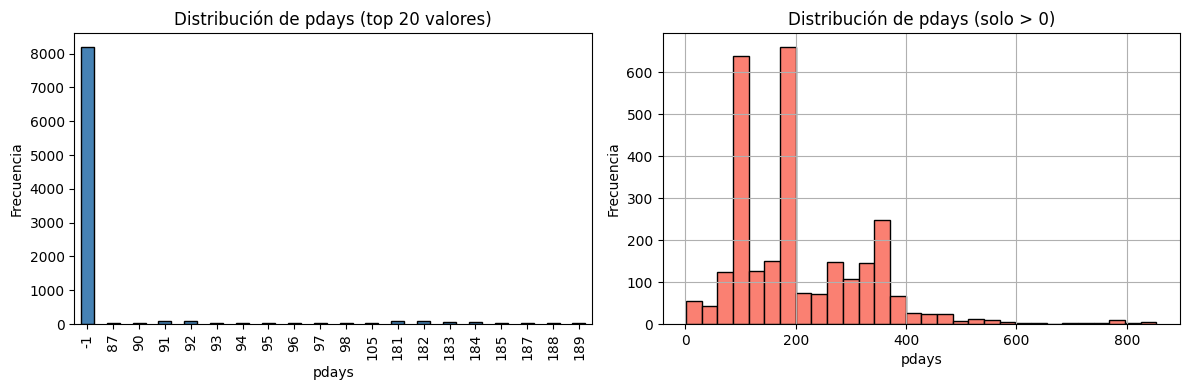

In [96]:
print('=== Análisis de pdays ===')
print(f'Rango: [{df_datos["pdays"].min()}, {df_datos["pdays"].max()}]')
print(f'Valores -1 (sin contacto previo): {(df_datos["pdays"] == -1).sum()} ({(df_datos["pdays"] == -1).mean()*100:.1f}%)')
print(f'Valores > 0 (con contacto previo): {(df_datos["pdays"] > 0).sum()} ({(df_datos["pdays"] > 0).mean()*100:.1f}%)')

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Distribución completa
df_datos['pdays'].value_counts().head(20).sort_index().plot(kind='bar', ax=axes[0], color='steelblue', edgecolor='black')
axes[0].set_title('Distribución de pdays (top 20 valores)')
axes[0].set_xlabel('pdays')
axes[0].set_ylabel('Frecuencia')

# Solo valores > 0
df_datos[df_datos['pdays'] > 0]['pdays'].hist(ax=axes[1], bins=30, color='salmon', edgecolor='black')
axes[1].set_title('Distribución de pdays (solo > 0)')
axes[1].set_xlabel('pdays')
axes[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

#### Preprocesamiento de pdays:

La variable pdays tiene un significado especial: -1 indica que el cliente no fue contactado en campañas anteriores. Tratar este -1 como un número sería un error ya que implica que fue contactado hace -1 días, lo cual no tiene sentido.

Estrategia propuesta:
1. Crear una variable binaria pdays_contacted (1 si fue contactado antes, 0 si no).
2. Reemplazar los -1 por NaN en pdays y luego imputar con la mediana.

*También habrá que añadir esta nueva variable como categórica.

In [97]:
# Preproceso de pdays
df_datos['pdays_contacted'] = (df_datos['pdays'] != -1).astype(int)
df_datos['pdays'] = df_datos['pdays'].replace(-1, np.nan)

#Añadimos pdays_contacted a la lista de variables categóricas
variables_categoricas.append('pdays_contacted')

print('Nuevas columnas:')
print(df_datos[['pdays', 'pdays_contacted']].describe())
print(f'\nNaN en pdays tras reemplazo: {df_datos["pdays"].isna().sum()} ({df_datos["pdays"].isna().mean()*100:.1f}%)')
print(f'Clientes contactados previamente: {df_datos["pdays_contacted"].sum()} ({df_datos["pdays_contacted"].mean()*100:.1f}%)')

Nuevas columnas:
             pdays  pdays_contacted
count  2797.000000     11000.000000
mean    204.718627         0.254273
std     122.397953         0.435471
min       1.000000         0.000000
25%      98.000000         0.000000
50%     182.000000         0.000000
75%     286.000000         1.000000
max     854.000000         1.000000

NaN en pdays tras reemplazo: 8203 (74.6%)
Clientes contactados previamente: 2797 (25.4%)


### 1.11.Resumen del EDA

In [100]:
resumen = {
    'Instancias': df_datos.shape[0],
    'Variables totales (incluyendo target)': df_datos.shape[1],
    'Variables numéricas': len(variables_numericas),
    'Variables categóricas': len(variables_categoricas),
    'Variables ordinales': len(variables_ordinales),
    'Variables con alta cardinalidad (>10)': len(card_alta),
    'Columnas constantes': len(columnas_constantes),
    'Columnas tipo ID': len(columnas_id),
    'Tipo de problema': 'Clasificación binaria',
    'Dataset desbalanceado': ratio > 1.5,
    'Ratio mayoría/minoría': round(ratio, 2),
}

for k, v in resumen.items():
    print(f'  {k}: {v}')

  Instancias: 11000
  Variables totales (incluyendo target): 18
  Variables numéricas: 7
  Variables categóricas: 9
  Variables ordinales: 2
  Variables con alta cardinalidad (>10): 2
  Columnas constantes: 0
  Columnas tipo ID: 0
  Tipo de problema: Clasificación binaria
  Dataset desbalanceado: False
  Ratio mayoría/minoría: 1.11
